In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
PS4C_dir = Path('/home/zequnl/Projects/PS4C/model/lagache/')

In [24]:
PS4C_freqs = ["100", "150"]

## Load Lagache model

In [25]:
lagache_counts = [
    np.genfromtxt(PS4C_dir / f'ns{freq}_radio.dat', 
                  names=('S', 'dNdS'))  
    for freq in PS4C_freqs]

In [26]:
# import h5py

# radio_dir = "/tigress/zequnl/radio/lagache_massage/"
# f = h5py.File(radio_dir + '/catalog_100.0.h5', 'r')
# f.keys()

In [30]:
freqs = ["100.0", "143.0"]

## Load in websky hdf5 catalogs

100.0
143.0
100.0
143.0


'Cochineal-Roman.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


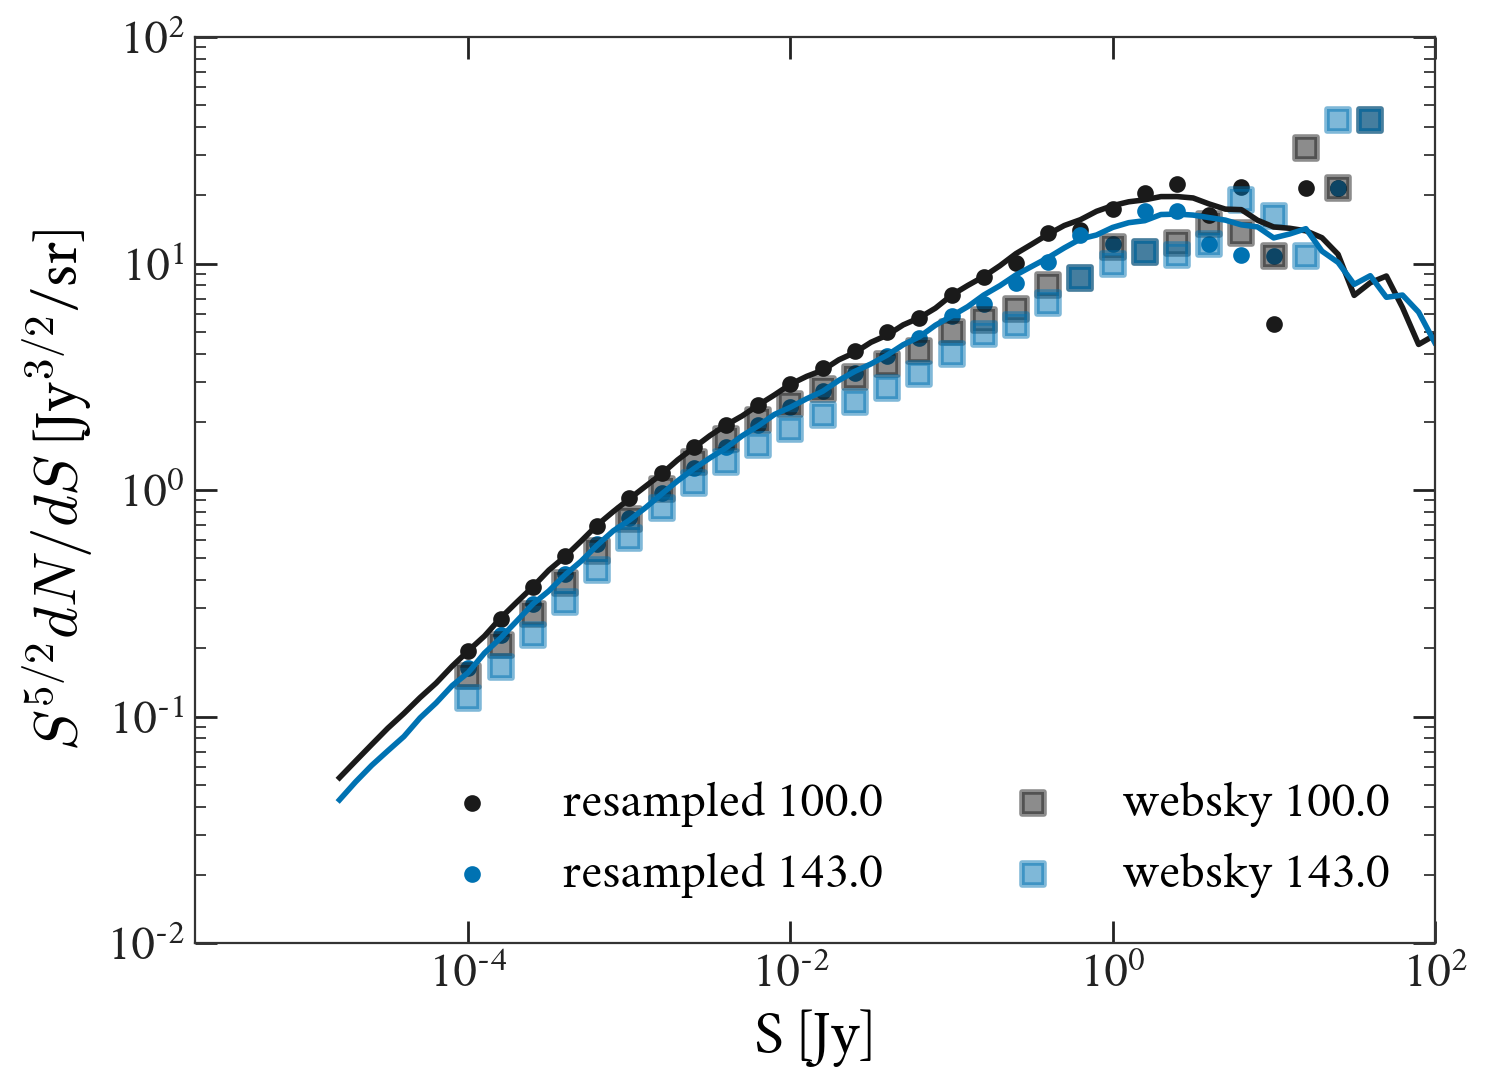

In [37]:
import h5py

count = {}
normed_counts = {}

for freq in freqs:
    print(freq)
    with h5py.File(f'/tigress/zequnl/radio/lagache_sed_massage/catalog_{freq}.h5', 'r') as f:
        
        bins = np.arange(-4.1, 2.5, 0.2)
        hist, bin_edges = np.histogram(np.log10(f['flux']), bins=bins)
        mids = (bin_edges[1:] + bin_edges[:-1])/2
        
        count[freq] = hist
        
        normed_count = (hist) * (10**mids)**2.5 / np.diff(10**bin_edges) / (4 * np.pi)
        normed_counts[freq] = normed_count
        
def plot_freq(index):
    freq = freqs[index]
    S = lagache_counts[index]['S']
    dN = lagache_counts[index]['dNdS']
    
    
    plt.plot(S, dN * S**(5/2), '-', 
             color=f'C{index}',)
    plt.scatter(10**mids, normed_counts[freq],
             color=f'C{index}',
             label=f"resampled {freq}" )
    
plt.figure(figsize=(8,6), facecolor='white')

for i, freq in enumerate(freqs):
    plot_freq(i)
    
    

# AD HOC
for freq in freqs:
    print(freq)
    with h5py.File(f'/tigress/zequnl/radio/catalog_{int(float(freq))}.h5', 'r') as f:
        
        bins = np.arange(-4.1, 2.5, 0.2)
        hist, bin_edges = np.histogram(np.log10(f['flux']), bins=bins)
        mids = (bin_edges[1:] + bin_edges[:-1])/2
        
        count[freq] = hist
        
        normed_count = (hist) * (10**mids)**2.5 / np.diff(10**bin_edges) / (4 * np.pi)
        normed_counts[freq] = normed_count
        
def plot_freq(index):
    freq = freqs[index]
    S = lagache_counts[index]['S']
    dN = lagache_counts[index]['dNdS']
    
    
#     plt.plot(S, dN * S**(5/2), '-', 
#              color=f'C{index+1}',)
    plt.scatter(10**mids, normed_counts[freq],
#              color=f'C{index+3}', 
             marker="s",
             label=f"websky {freq}", alpha=0.5)
    
# plt.figure(figsize=(6,5), facecolor='white')

for i, freq in enumerate(freqs):
    plot_freq(i)
    
    
    
    
    
    
# plt.title('Lagache')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2, 1e2)
plt.xlim(2e-6, 1e2)
plt.legend(ncol=2)
plt.ylabel('$S^{5/2} dN/dS$ [Jy$^{3/2}$/sr]')
plt.xlabel('S [Jy]')
plt.savefig("resampling.pdf")